## Final Project Submission

Please fill out:
* Student name: Adam Pell
* Student pace: Self Paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


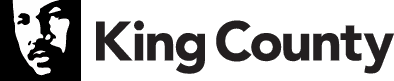

# <span style="font-size: 24pt;">King County Housing Analysis</span>

# Overview

This project will use regression analysis to analyze home prices in King County, Washington based on key attributes.

Iterative linear regression analysis of multiple attributes create a clearer picture of the factors that add value to (or detract value from) a home. My firm, Pell & Associates Realty, can use the information from this analysis to deliver effective and accurate insights to prospective home buyers and sellers.

# Business Problem

While buying or selling a home is a tremendously important transaction for many Americans, the process of finding the right price can be quite opaque, with large fluctuations in home values being attributed simply to market factors or location. At Pell & Associates Realty, our goal is to demystify King County housing prices through statistical analysis.

This project will examine comprehensive data from over 30,000 homes, discovering trends and building predictive models to forecast what your home will be worth when it's time for a move!

# Data Understanding

The available data comes from a record of home sales in King County. The records span from 1900 to 2022. In this analysis, I selected several key features to predict a home's price. They include:

- Livable square footage
- No. of bedrooms
- No. of bathrooms
- Year built
- View
- Condition (relating to overall maintenance)
- Grade (relating to construction and design quality)

# Data Analysis 

## Preparation

First, we need to load the dataset and get a look at the columns. This will help us visually identify a target variable and some likely predictors.

In [1]:
# Loading libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
# Loading the file
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


At first glance, it seems we have both numeric and categorical columns to deal with, but a lot of the categorical columns are binary or have an inherent ordinal relationship, which makes encoding easier if we need to do it.

We will be using price for our target, so we will need to think about which of these columns make the most sense to include as our independent variables.

The information in this dataset covers everything from size to location to condition, so we will have plenty of predictors to choose from.

In [4]:
# Getting a full view of all the columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

Now, let's check out the format of each column and whether there are any null values to clean up.

In [5]:
# Checking null counts and types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

Looks relatively clean! I do see some null values in there, so let's examine that a bit further to see if it will be a problem.

In [6]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

With only 32 and 14 null values in those columns respectively, I don't think it would be a problem to remove those values if I end up using the column, considering the nulls represent about .1% of the total rows (or less).

Now that we at least know that our numeric data is clean, let's take a look at some key metrics before we make a model.

In [7]:
# Getting key metric for numeric columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Some interesting initial findings here. In this study, we care a lot about price, so we want to pay attention to the shape of that data and whether there are significant outliers.

The average sale is around 1.1 million dollars, so it is interesting that the third quartile is only 1.3 million dollars and that the mean is on the lower side considering that the largest sale is over 30 million dollars. This indicates to me that we may have some skew. Let's check that now.

In [8]:
# Checking price data skew
df['price'].skew()

6.602906641900009

In [9]:
# Checking price data kurtosis
df['price'].kurtosis()

106.16489954535392

A skewness of 6.6 and kurtosis of 106 indicates a very heavy right skew, meaning that the majority of data points cluster on the left side of the distribution and there is a very long "tail" of outliers stretching it out towards the right. In the context of home sales, this kind of makes sense, since there are often a smaller number of homes that sell for a price several standard deviations away from the mean. And, while there is no upper bound for what a home can sell for, there is a lower bound (a home can't sell for less than zero dollars).

If we want to make a model using price as our target, we might want to keep an eye on the shape of this distribution as it suggests that we may want to scale the data to make it more meaningful and interpretable.

We can visualize the price data below, with the x-axis being measured in the 10s of millions:

<AxesSubplot:xlabel='price', ylabel='Density'>

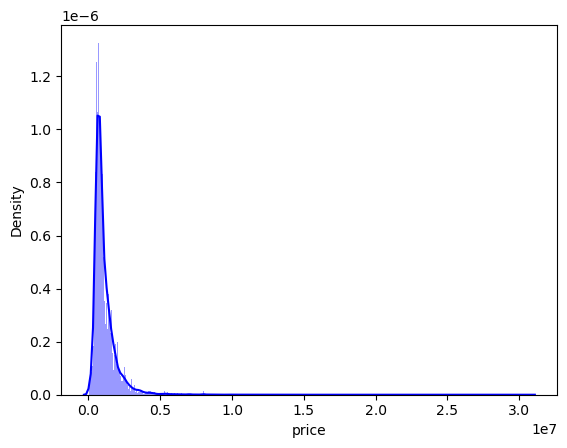

In [10]:
# Plotting density of prices
sns.distplot(df['price'], kde=True, bins=1000, color='blue')

We can see the rather extreme left-skew here. We can see how our model evolves over iterations, but, down the line, we could consider scaling this data to smooth out the curve and normalize it.

## Preliminary Model

Since price is going to be our dependent variable, we should label it as our target. Next, let's start checking which other factors we can use as our independent variables. Correlation values could tell us more about which columns are more or less likely to predict the price of a home.

In [11]:
# Labeling price as our target variable
target = df['price']

# Checking price correlations with other columns
df.corrwith(target).sort_values(ascending=False)

price            1.000000
sqft_living      0.608521
sqft_above       0.538651
bathrooms        0.480401
sqft_patio       0.313409
bedrooms         0.289204
sqft_garage      0.264169
sqft_basement    0.245058
floors           0.180576
yr_built         0.096013
sqft_lot         0.085730
yr_renovated     0.084786
lat              0.063632
long            -0.022509
id              -0.034184
dtype: float64

So, it seems that--fairly predictably-- the livable square footage of a home is correlated with its price. Interestingly, the number of bathrooms is more correlated than the number of bedrooms, but both might be correlated enough to use down the line. As we move down the list, we see some other interesting minor correlations such as garage and basement square footage. For now, though, let's start with the low-hanging fruit of square footage and set up a simple regression model.

First, we can set up a visualization to see if the correlation looks roughly linear.

Text(0, 0.5, 'Price')

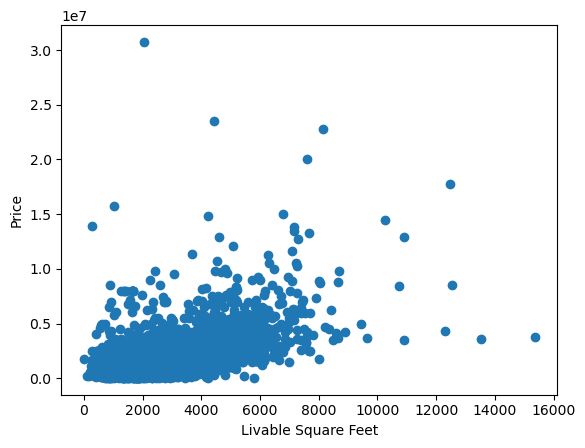

In [12]:
# Creating scatter plot for relationship between sq. feet and price
sqft = df['sqft_living']
plt.scatter(x=sqft, y=target)

# Labeling axes
plt.xlabel('Livable Square Feet')
plt.ylabel('Price')

That should be linear enough for this model. Let's fit our first regression:

In [13]:
# Fitting preliminary model and visualizing results

# Setting variables for target and predictors
y = target
X_prelim = sqft

# Fitting model
prelim_model = sm.OLS(y, sm.add_constant(X_prelim)).fit()

# Printing results
print(prelim_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:22:30   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      

In [14]:
# Defining a function to calculate RMSE
def get_rmse(actual, predicted):
    
    # Calculating MSE using actual values minus predicted values
    mse = np.mean((np.array(actual) - np.array(predicted)) ** 2)
    
    # Taking square root of MSE
    rmse = np.sqrt(mse)
    return rmse

In [15]:
# Getting RMSE for preliminary model
get_rmse(y, prelim_model.predict())

711303.9200126048

With an R-squared value of .370, we can say that about 37% of variation in the dependent variable here is explained by our independent variable (square footage of living space). While this is a bit low, it's just a baseline and can be improved. Also, on the bright side, we have a p-value of 0, meaning that our results would be considered significant with a standard alpha of 0.05. This means that livable square footage is indeed a viable predictor of home price.

Our root mean squared error (RMSE) is pretty high right now at over 700,000 dollars. While there is a wide price range represented in the data, the average home price is 1.1 million dollars, which indicates that our prediction error is fairly large in proportion to the mean. We can try and improve this in future models. 

In terms of coefficients, the intercept set here is negative. This seems counterintuitive, because you can't really have a negative price if your square footage is zero. I suspect that the cause for this is the cluster of datapoints on the left of our data. We also don't have much data where square footage is near zero, so the model has to extrapolate and may not accurately project a correct value as we move closer to the intercept.

In terms of our square footage coefficient, this model indicates that, for every unit increase in square footage, we get a 560 dollar increase in price. So, every time we add a square foot of living space, we can bump our price by over 500 dollars! Keep in mind that this does not include square footage of things like patios and garages (those are separate variables).

Our t-statistic is high and positive and our p-value is 0. Both of these values mean that we can safely reject the null hypothesis (which, in this case, would be that livable square footage does not have an affect on a home's price).

Even from this preliminary model, we can come away with confirmation that, indeed, more livable square footage does increase the value of a home. Based on this model, my advice to homeowners looking to increase the value of their homes would be--as a first step-- to try converting more of their home to something that could be defined as "livable space". Perhaps that means renovating a basement or converting a partial garage, but more is clearly better in this case.

When we graph our predicted values below, we can actually see that our preliminary model is consistently predicting prices that are lower than the actual reported prices in the dataset. This leads me to believe that, in its current state, the model is actually underestimating prices, especially as homes get larger. Even without adding any extra variables, we can see how significant those extra square feet can actually be:

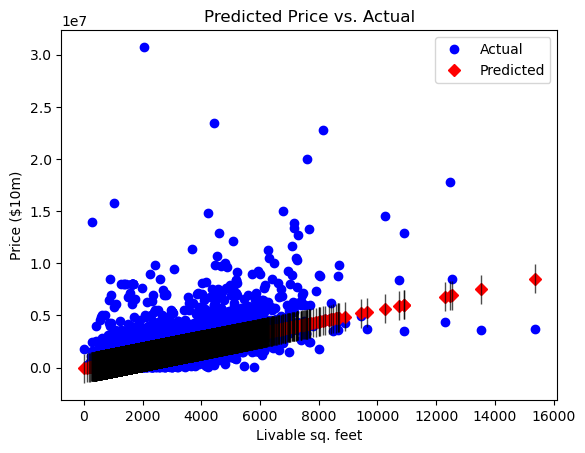

In [16]:
# Plotting fitted values vs. actual values
sm.graphics.plot_fit(prelim_model, 'sqft_living')

# Setting title and labeling axes
plt.title('Predicted Price vs. Actual')
plt.xlabel('Livable sq. feet')
plt.ylabel('Price ($10m)')

# Setting legend
plt.legend(['Actual', 'Predicted'])

plt.show()

While this graph is telling, it does suggest heteroscedasticity in the model, meaning that variance of errors increases as square footage increases. This makes sense right now, because there are so many other predictors of price that we can dig deeper into as we improve our model.

This is a good start, but I want to try scaling the values in this model. That may help us improve it as a baseline. Since the price data is right-skewed, it would be appropriate to try log-scaling to make it more symmetric.

<AxesSubplot:xlabel='log_price', ylabel='Density'>

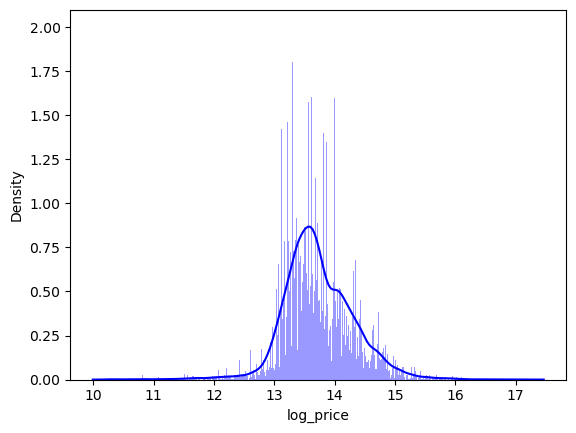

In [17]:
# Log-scaling dependent variable
df['log_price'] = np.log(df['price'])
# Plotting log-scaled data
sns.distplot(df['log_price'], kde=True, bins=1000, color='blue')

That looks a lot more normal, even if it's not perfect. We can try running the model again, this time with less skewed price data.

In [18]:
# Running same model with log price
target_log = df['log_price']
logscale_prelim_model = sm.OLS(target_log, sm.add_constant(X_prelim)).fit()
print(logscale_prelim_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.898e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:22:32   Log-Likelihood:                -19148.
No. Observations:               30155   AIC:                         3.830e+04
Df Residuals:                   30153   BIC:                         3.832e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9491      0.006   2062.042      

Okay, so scaling the data didn't actually help us with our R-squared too much. Also, the log scaling could make our results a bit harder to interpret. What about square-root scaling?

In [19]:
# Square-root scaling price
df['sqrt_price'] = np.sqrt(df['price'])

In [20]:
# Running same model with square-root price
target_sqrt = df['sqrt_price']
sqrtscale_prelim_model = sm.OLS(target_sqrt, sm.add_constant(X_prelim)).fit()
print(sqrtscale_prelim_model.summary())

                            OLS Regression Results                            
Dep. Variable:             sqrt_price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                 2.297e+04
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:22:32   Log-Likelihood:            -2.0814e+05
No. Observations:               30155   AIC:                         4.163e+05
Df Residuals:                   30153   BIC:                         4.163e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         547.6747      3.310    165.471      

That's pretty good! Remember, since it's square-root scaled, we would have to tally up the predicted unit totals based on the square footage and constant, and then square the final price result. I like the boost to our prediction value. If we fit the values again, it seems like our predicted prices are a little closer to reality, especially as homes get larger:

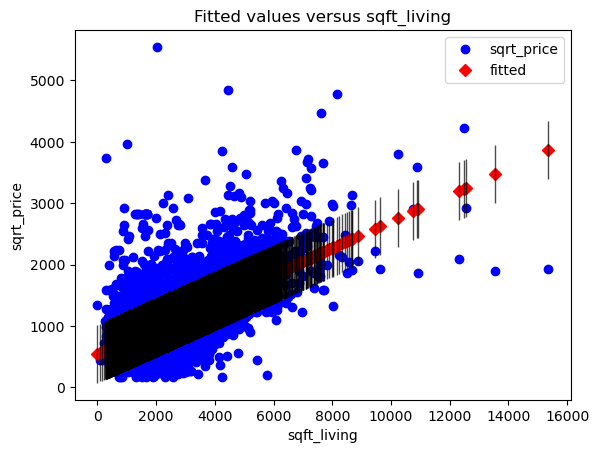

In [21]:
# Plotting fitted values vs. actual values
sm.graphics.plot_fit(sqrtscale_prelim_model, 'sqft_living')
plt.show()

We can also generate some more graphs to explore a couple of our key linear regression assumptions:

eval_env: 1


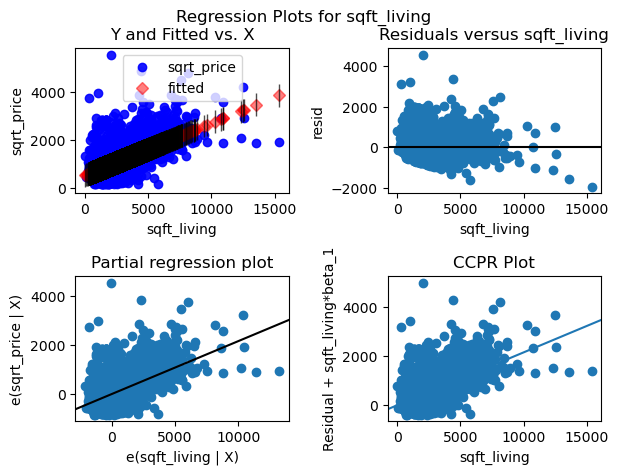

In [22]:
# Creating more graphs for sqrtscale model
sm.graphics.plot_regress_exog(sqrtscale_prelim_model, 'sqft_living')
plt.show()

The two graphs to really look at here are in the top row. As above, our fitted values graph seems good for linearity. This further confirms that we do have a linear relationship here. While we do still seem to have a homoscedasticity problem, the residuals plot seems relatively straight. The partial regression plot and the CCPR plot will matter more later when we add more variables.

Now that we've analyzed our simple regression, we can see what happens when we make our model more complex by adding more variables.

## Second Iteration: Adding Numeric Variables

We still have lots of room for improvement to our prediction capabilities, so let's see if we can add some more significant variables to our model! In terms of numeric variables, I definitely want to explore what happens if we add bedrooms and bathrooms into the equation.

If we look at the correlations with price, bathrooms and bedrooms stand out as logical ones to try. I also think adding "year built" could increase our prediction accuracy, as it extends our prediction beyond just physical space. For now, I'm going to avoid transforming the dependent variable for the sake of interpretability.

In [23]:
# Adding new variables and fitting second model

# Setting variables for target and predictors
y = target
X_second = df[['sqft_living', 'bathrooms', 'bedrooms', 'yr_built']]

# Fitting model
second_model = sm.OLS(y, sm.add_constant(X_second)).fit()

# Printing Results
print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     5073.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:22:33   Log-Likelihood:            -4.4834e+05
No. Observations:               30155   AIC:                         8.967e+05
Df Residuals:                   30150   BIC:                         8.967e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.404e+06   2.75e+05     26.959      

In [24]:
# Getting RMSE for second model
get_rmse(y, second_model.predict())

693012.0985133613

We can see a small boost in our prediction value. Also, our intercept has now moved into the positive range, which looks better in a real-world context. Our RMSE remains high but has dropped by about 20,000 dollars.

Our square footage coefficient has increased bit, growing by about 50 dollars. Bathrooms, which had a higher correlation with price than bedrooms, has a coefficient of 6,240 dollars. This means that every bathroom adds about that much to a home's price.

Interestingly, our bedrooms coefficient is negative, suggesting that every extra bedroom actually devalues a home by 150,000 dollars. This is likely due to multicollinearity, meaning, in this case, that the effect of bedrooms on home price could be being described already by other variables in the model. Multicollinearity may be hard to avoid in this model, because many facets of a home not only affect price, but affect one another. Given the subject matter and the fact that we're mainly focusing more on prediction, that might be tolerable.

"Year built" also seems to negatively affect price, and I think that could be explained by the fact that older homes can sometimes be larger or carry desireable design traits. Also, old homes that have been extensively renovated over the years can change significantly in value. The same goes for newer homes that have not been renovated and have gone out of style.

For buyers and sellers, the takeaway from this model is less about what to look for and more about what to potentially disregard. For example: don't be scared to take on an older home! We can see that brand-new houses aren't always necessarily the gold standard for value. And, of course, they can only get older. Also, bathrooms and bedrooms don't matter as much as you'd think! In fact, overall square footage is much more likely to add significant value.

Before we move on, I want to visualize square footage again, now in the context of more variables:

eval_env: 1


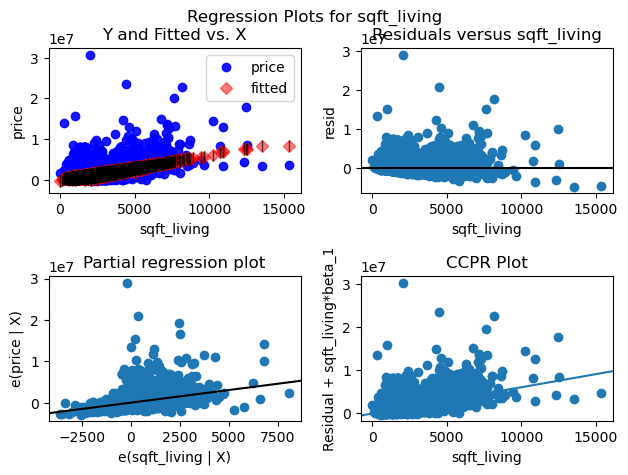

In [25]:
# Creating graphs for second model with "sqft_living"
sm.graphics.plot_regress_exog(second_model, 'sqft_living')
plt.show()

Taking a closer look at the bottom row of graphs now, both the partial regression plot and the CCPR plot yield similar findings. Even with accounting for other variables, square footage does have a significant positive relationship with price. However, there are clearly a lot of factors at play that we're not capturing.

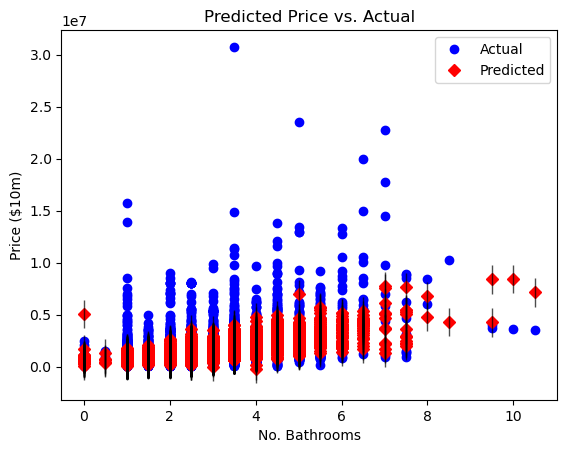

In [26]:
# Plotting fitted values vs. actual values
sm.graphics.plot_fit(second_model, 'bathrooms')

# Setting title and labeling axes
plt.title('Predicted Price vs. Actual')
plt.xlabel('No. Bathrooms')
plt.ylabel('Price ($10m)')

# Setting legend
plt.legend(['Actual', 'Predicted'])

plt.show()

At this point, we have used up the numeric variables that are most correlated with price. It has yielded a small increase of the R-squared value. To further improve the model, we should take a look at our categorical variables and see if we can encode any valuable metrics.

## Third Iteration: Adding Categorical Variables

First, let's take a look at our options:

In [27]:
# Finding non-numeric variables
df.select_dtypes(include='object')

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
0,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
1,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
2,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
3,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
4,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."
...,...,...,...,...,...,...,...,...,...,...
30150,11/30/2021,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,"4673 Eastern Avenue North, Seattle, Washington..."
30151,6/16/2021,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,"4131 44th Avenue Southwest, Seattle, Washingto..."
30152,5/27/2022,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,"910 Martin Luther King Jr Way, Seattle, Washin..."
30153,2/24/2022,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,"17127 114th Avenue Southeast, Renton, Washingt..."


A few columns stick out to me right off the bat: 'grade', 'condition', and 'view'. These three could all be good predictive metrics because they are both easy to encode and ranked in terms of quality. It would make sense that a house with higher grades or condition scores would be more expensive. Similarly, a house with an above-average view is also more likely to be more expensive. I'd like to see how all three of these variables fit in our model, so let's begin encoding!

First, I want to see the breakdown of grades:

In [28]:
# Getting grade values
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

It makes sense and is a good sign that most of the scores are clustered around average. Now, I want to get the words out of each row. I can do this by extracting just the numbers from the rows and casting them as integers:

In [29]:
# Extracting numeric strings and casting as integers
df['grade'] = df['grade'].str.extract('(\d+)').astype(int)
df['grade']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: grade, Length: 30155, dtype: int64

By doing this, I have effectively created an encoded column! Now, let's move on to condition, which might need a bit more work to encode.

In [30]:
# Getting condition values
df['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

In [31]:
# Importing ordinal encoding library
from sklearn.preprocessing import OrdinalEncoder

# Encoding condition
condition = df[['condition']]
ordinal_encoder = OrdinalEncoder()
df['encoded_condition'] = ordinal_encoder.fit_transform(condition)

In [32]:
# Checking to see correct values
df['encoded_condition'].value_counts()

0.0    18547
2.0     8054
4.0     3259
1.0      230
3.0       65
Name: encoded_condition, dtype: int64

This turned out wrong, so I have to set a custom order:

In [33]:
# Setting custom order
custom_order_condition = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']

# Encoding condition again
condition = df[['condition']]
ordinal_encoder = OrdinalEncoder(categories=[custom_order_condition])
df['encoded_condition'] = ordinal_encoder.fit_transform(condition)

In [34]:
# Checking to see correct values
df['encoded_condition'].value_counts()

2.0    18547
3.0     8054
4.0     3259
1.0      230
0.0       65
Name: encoded_condition, dtype: int64

Much better! Now, let' move on to encoding view.

This is another ordinal relationship, so we can follow a process similar to condition.

In [35]:
# Getting view values
df['view'].value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [36]:
# Fixing capitalization
df['view'] = df['view'].str.title()
view = df[['view']]

# Setting custom order
custom_order_view = ['None', 'Fair', 'Average', 'Good', 'Excellent']

#Encoding view
ordinal_encoder = OrdinalEncoder(categories=[custom_order_view])
df['encoded_view'] = ordinal_encoder.fit_transform(view)

# Checking to see correct values
df['encoded_view'].value_counts()

0.0    26589
2.0     1915
3.0      878
4.0      553
1.0      220
Name: encoded_view, dtype: int64

Now that we've transformed those categorical variables, we can add them to our model to see how they perform:

In [37]:
# Adding new variables and fitting third model

# Setting variables for target and predictors
X_third = df[['sqft_living', 'bathrooms', 'bedrooms', 'grade', 'encoded_condition', 'encoded_view', 'yr_built']]

# Fitting model
third_model = sm.OLS(y, sm.add_constant(X_third)).fit()

# Printing Results
print(third_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     3699.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:22:34   Log-Likelihood:            -4.4675e+05
No. Observations:               30155   AIC:                         8.935e+05
Df Residuals:                   30147   BIC:                         8.936e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.906e+06   2.91e+0

In [38]:
# Getting RMSE for third model
get_rmse(y, third_model.predict())

657463.0640250461

Adding these variables has yielded a solid improvement in our prediction value. We have managed to drop our prediction error by about 54,000 dollars, so our model is now a little more accurate.

As for our coefficients, the negative bedroom problem still persists, likely for the same reasons as before. The effect of livable square footage has decreased as we've added variables, now only accounting for about 373 dollars per square foot. This actually makes sense in the context of our graphs from previous models, as it was clear that, while square footage had a clear positive affect on price, there were many more valuation factors that the relationship failed to capture. 

Each bathroom adds about 9600 dollars to a home's value, and each bedroom still, to the model, diminishes a home's value. However, both of our negative influences (bedrooms and year built) are far outweighed by some of our new features. 

The categorical variables we added have proven significant, with each increase in grade adding, on average, around 250,000 dollars to the price of a home. The view feature that we encoded suggests that better views do correlate with higher prices, to the tune of about 130,000 dollars per increase in view quality. Our encoded condition value matters less than the other values, only accounting for about 12000 dollars per unit increase. This probably makes sense, since "condition" has more to do with maintenance of the house while "grade" has to do with more fundamental aspects such as construction and design quality.

All of the coefficient p-values are zero except for condition, which still manages to be significant at 0.034. 

Since grade and condition are both important new features, we can visualize their relationship with price below:

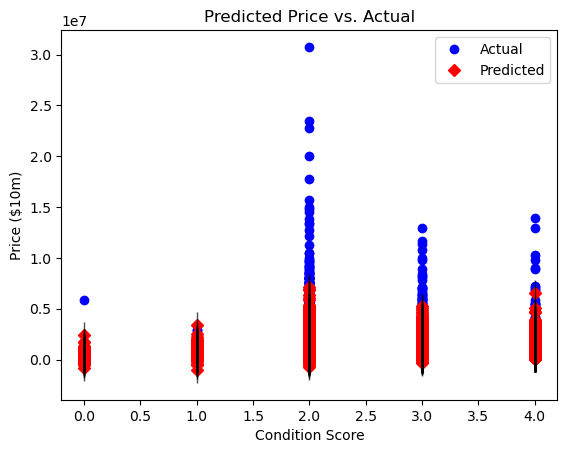

In [39]:
# Plotting fitted values vs. actual values for condition
sm.graphics.plot_fit(third_model, 'encoded_condition')

# Labeling axes and setting title
plt.title('Predicted Price vs. Actual')
plt.xlabel('Condition Score')
plt.ylabel('Price ($10m)')

# Setting legend
plt.legend(['Actual', 'Predicted'])

plt.show()

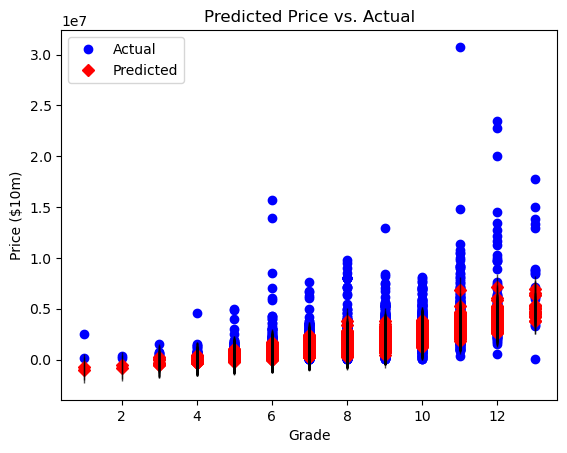

In [40]:
# Plotting fitted values vs. actual values for grade
sm.graphics.plot_fit(third_model, 'grade')

# Labeling axes and setting title
plt.title('Predicted Price vs. Actual')
plt.xlabel('Grade')
plt.ylabel('Price ($10m)')

# Setting legend
plt.legend(['Actual', 'Predicted'])

plt.show()

We can see that, similar to our fitted values based on livable square footage, our model is actually underestimating how much grade and condition contribute to a home's price. Our fitted predictions are consistently a fair bit lower, especially as we go up the price scale.

Before we go into a business assessment of these results, **I want to see how our model does on our five linear regression assumptions:**

- Linearity
- Normality
- Independence
- Homoscedasticity
- Multicollinearity

### Linearity

Text(0, 0.5, 'Residuals')

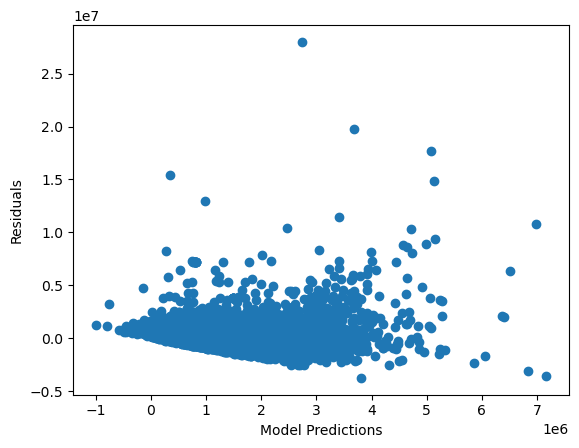

In [41]:
# Plotting residuals against predictions
model_preds = third_model.predict()
resids = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)

# Labeling axes
ax.set_xlabel("Model Predictions")
ax.set_ylabel("Residuals")

This plot suggests a linear relationship between our predictions and our residuals. As prices become more expensive, however, we do start to see a lot more variance in errors, as evidenced by the dots towards the right starting to drift further and further apart.

### Normality

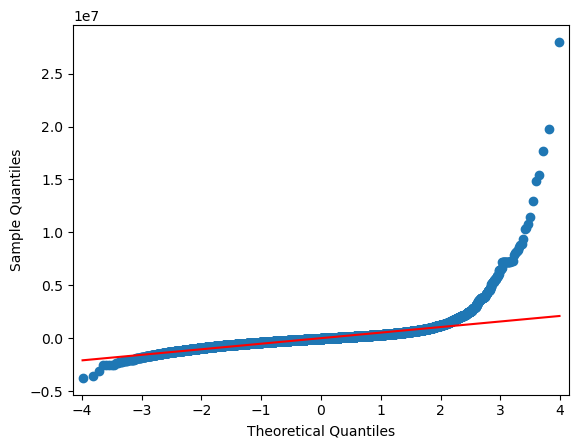

In [42]:
# Creating a QQ plot
sm.qqplot(resids, line='r')
plt.show()

Ideally, we would want this to follow the red line as closely as possible. We see that, for most values, we follow the line very closely, but we still have a lot of wandering at the ends, especially for higher outliers. While we do see that variation, our Jarque-Bera test shows a p-value of 0.00, meaning that there is a very low chance of these errors being normal.

### Independence and Homoscedasticity

Text(0, 0.5, 'Residuals')

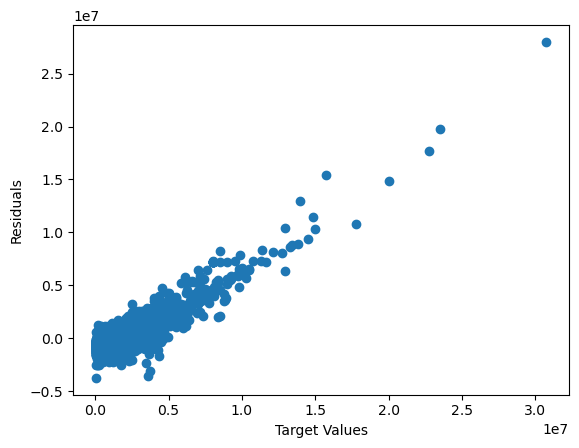

In [43]:
# Plotting target values against residuals
fig, ax = plt.subplots()

ax.scatter(y, resids)

# Labeling axes
ax.set_xlabel('Target Values')
ax.set_ylabel('Residuals')

Based on the graph above, it does seem like our errors are pretty correlated. We'd like to see these errors all over the place, kind of an amorphous cloud loosely around the horizontal axis. Instead, we get a clearly positive linear relationship. Our Durbin-Watson statistic of 1.8 supports this, showing that these values are certainly not perfectly independent. The explanation for this could be explained by heteroscedasticity in the model, meaning that our variance of errors is not constant. We would run a similar test to find this heteroscedasticity. The fact that those points start to vary as we get higher up the graph are telltale signs.

### Multicollinearity

As statsmodels has told us, the condition number for this model is very, very high. That suggests strong multicollinarity. This may be something we have to live with for this dataset, as all of our variables will inevitably have an effect on one another. Because a house is made up of so many intermingled parts, things like square footage will inevitably affect the number of bedrooms and bathrooms, and vice versa. Similarly, larger homes are more likely to have fancier design, so the grade could be similarly affected.

We can visualize these interactions with a heatmap:

<AxesSubplot:>

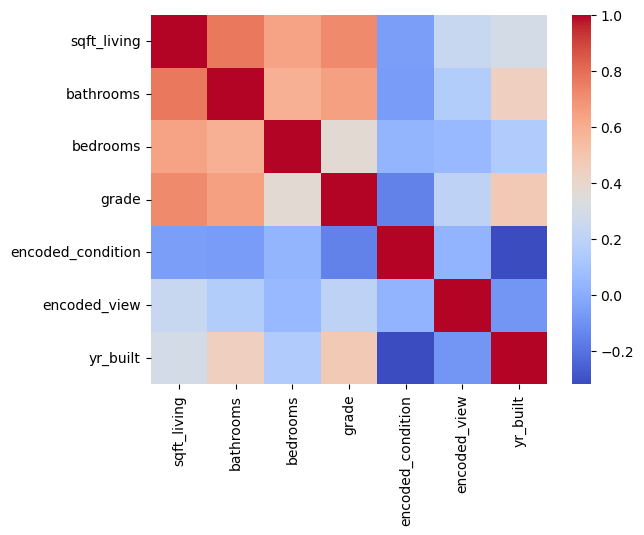

In [44]:
# Creating a correlation table for predictors in third_model
X_third_corrs = X_third.corr()

# Creating heatmap of the correlation table
sns.heatmap(X_third_corrs, cmap='coolwarm')

As we can see, there is a *ton* of correlation in the top-left quadrant of the heatmap. That is where interactions are happening between square feet, bathrooms, bedrooms, and grade. It makes sense that a lot of the intermingling is coming from here, because larger houses are more likely to have more bedrooms, more bathrooms, and a higher grade. While there are some other correlations, we can assume that the bulk of our multicollinearity is coming from that top-left cluster of highly-correlated values-- especially because we have seen a high condition number ever since we added bathrooms and bedrooms early on.

# Conclusions

The model I chose to use for my final recommendation is the last model that I made, "third_model". This model is the most predictive and is comprised of the most useful features for us. It is also easy to interpret as no special scaling has been used (unlike earlier models where I used log and square-root scaling). Here it is again below:

In [45]:
print(third_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     3699.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:22:36   Log-Likelihood:            -4.4675e+05
No. Observations:               30155   AIC:                         8.935e+05
Df Residuals:                   30147   BIC:                         8.936e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.906e+06   2.91e+0

Our final regression model paints a more complete picture of the factors to ignore and the factors to prioritize, whether you're buying or selling.

Not surprisingly, the key takeaways are that space and quality really add value. But how do these findings affect our clients?

### Buyers
Buyers have a lot to pay attention to when looking for a prospective home. Not only should the design and layout speak to them, but they really need the home to preserve its value over time. Therefore, according to the Pell & Associates Realty analysis, buyers should pay a lot of attention to a home's grade. As evidenced in the dataset, King County assigns these grades to every home in the record. When touring, prospective buyers should demand to see the grade, as it not only provides vital information on the quality of the home, but also is a key factor in increasing or decreasing that home's value in the event of an purchase offer or future sale. Of course, having a nice view would help as well, but that is secondary in significance and can also be harder to come by.

**Prospective buyers should primarily be asking about the quality of a home's base attributes and finishes.**

### Sellers
Sellers have more control over how their home looks and presents on the market. In light of that, they can look beyond the grade and prioritize physical and cosmetic improvements. This includes things like "condition", livable square feet, and bathrooms. The King County Assessor defines condition as a function of a home's maintenance: Have faulty appliances been repaired? Has the home been touched up and renovated? These are the types of question an assessor would ask. These are also questions you are likely to get from interested buyers. As a seller, you want to make sure your home is in tip-top shape when it hits the market. That doesn't just mean repainting-- sellers should ensure all appliances are up-to-date and working well. Our analysis indicates that the value a good condition grade adds to a home is quite significant, potentially far outstripping the cost of renovations.

**Overall, sellers should prioritize livable space and keep on top of maintenance and renovations.**

These recommendations should allow both buyers and sellers to maximize the value of a residential transaction. While there are other factors at play that could merit further investigation, this analysis allows our clients to see exactly how the physical attributes of a home can impact value.

## Next Steps
Further analyses could yield additional insights for our clients. These include:

- Close analysis of ZIP codes/location
- Addition of noise pollution metrics to the model
- Different modeling techniques

## Contact Information

**Adam Pell**
- Email: apell7591@gmail.com
- Phone: 917-434-6615
- GitHub: [@apell74](https://github.com/apell74)
- LinkedIn: [Adam Pell](https://www.linkedin.com/in/adam-pell-911868154)